<a href="https://colab.research.google.com/github/Pranav335/CS910/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [58]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Question 1

In [59]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [60]:
xtrain.shape

(60000, 28, 28)

In [61]:
ytrain.shape

(60000,)

In [62]:
type(xtrain)

numpy.ndarray

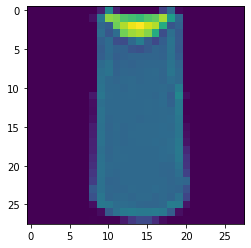

In [63]:


plt.imshow(xtrain[2,:,:])

In [64]:
def softmax(x):
  exps = np.exp(x)
  return exps/ np.sum(exps, axis = -1, keepdims = True)

x = np.array([[1, 2], [4 ,2], [3,2]])
softmax(x=x)

array([[0.26894142, 0.73105858],
       [0.88079708, 0.11920292],
       [0.73105858, 0.26894142]])

In [65]:
np.sum(np.exp(x), axis = -1, keepdims = True).shape

(3, 1)

# Question 2


Lets define the dimension of the various matrixes and vector.

W -> (N)

In [66]:
class neural_network:

  def __init__(self, x , hidden_layer = [2]):
    self.x = x
    self.n_x = x.shape[1]
    self.L = len(hidden_layer)
    self.neuron = [self.n_x] + hidden_layer + [10]
    self.W = {}
    self.B = {}
    for i in range(self.L + 1):
      self.W[i+1] = np.random.randn(self.neuron[i], self.neuron[i+1])
      self.B[i+1] = np.zeros((self.neuron[i+1]))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self, x):
    exps = np.exp(x)
    return exps/ np.sum(exps, axis = -1, keepdims = True)

  def forward_pass(self):
    self.A = {}
    self.H = {}
    self.H[0] = self.x
    for i in range(self.L):
      self.A[i+1] = self.H[i] @ self.W[i+1] + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])

    self.A[self.L+1] = self.H[self.L] @ self.W[self.L+1] + self.B[self.L+1]
    self.H[self.L+1] = self.softmax(self.A[self.L + 1])

    return self.H[self.L+1]





In [67]:
# Reshaping the array into a new row.
xtrain = np.reshape(xtrain, (xtrain.shape[0], -1))/255
xtest = np.reshape(xtrain, (xtest.shape[0], -1))/255
xtrain.shape

(60000, 784)

In [68]:
xtrain[1, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215686, 0.53333333, 0.85882353, 0.84705882, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.85098039, 0.84313725, 0.99607843, 0.90588235, 0.62745098,
       0.17647059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.69019608, 0.87058824, 0.87843137,
       0.83137255, 0.79607843, 0.77647059, 0.76862745, 0.78431373,
       0.84313725, 0.8       , 0.79215686, 0.78823529, 0.78823

# Question 3

In [69]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
class neural_network:

  def __init__(self, x , hidden_layer = [2]):
    self.x = x # (N x 784)
    self.n_x = x.shape[1] # 784
    self.L = len(hidden_layer) # 1
    self.neuron = [self.n_x] + hidden_layer + [10] # [784, 1, 10 ]
    self.W = {}
    self.B = {}
    self.A = {}
    self.H = {}
    for i in range(self.L + 1):
      self.W[i+1] = np.random.randn(self.neuron[i+1], self.neuron[i]) #[n_y x n_x]
      self.B[i+1] = np.zeros((self.neuron[i+1], 1)) # [n_y, 1]

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self, x):
    exps = np.exp(x)
    return exps/ np.sum(exps, axis = -1, keepdims = True)

  def forward_pass(self):
    self.H[0] = self.x.T # (784 x N)
    for i in range(self.L):
      self.A[i+1] = self.W[i+1] @ self.H[i]  + self.B[i+1] # (2, 784) x (784, N) + (2, 1) -> (2, N)
      self.H[i+1] = self.sigmoid(self.A[i+1]) #(2, N)

    self.A[self.L+1] = self.W[self.L+1] @ self.H[self.L] + self.B[self.L+1] #(k, k-1) x (k-1, N) + (k, 1)-> (k, N)
    self.H[self.L+1] = self.softmax(self.A[self.L + 1]) # (k, N)

    return self.H[self.L+1] 

  def grad_sigmoid(self,x):
    return x * (1 - x)

  def gradient(self, y):
    self.dW = {}
    self.dB = {}
    self.dA = {}
    self.dH = {}
    # y = (N, k)
    self.forward_pass()
    self.dA[self.L + 1] = self.H[self.L+1] - y.T # (k, N)
    for k in range(self.L+1, 0, -1):
      self.dW[k] = self.dA[k] @ self.H[k-1].T # (2, N) x (N, 2) -> (2, 2)
      self.dB[k] = np.sum(self.dA[k], axis = 1).reshape(-1, 1) # (2, N) -> (2, 1)
      if k > 1:
        self.dH[k-1] = self.W[k].T @ self.dA[k] 
        self.dA[k-1] = self.dH[k-1] * self.grad_sigmoid(self.A[k-1])

  def fit_neural_network(self,Y, epochs = 1000, lr = 0.1):
    loss = []
    for i in range(epochs):
      self.gradient(Y) # Y -> (N, k)

      for i in range(self.L + 1):
        self.W[i+1] -= lr * self.dW[i+1]
        self.B[i+1] -= lr * self.dB[i+1]
      
      yhat = self.forward_pass()
      epoch_loss = log_loss(Y,yhat.T)
      loss.append(epoch_loss)

    
    plt.plot([*range(epochs)], loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')




In [70]:
ytrain.shape

(60000,)

In [71]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
ytrain_oh = encoder.fit_transform(ytrain.reshape(-1,1))
ytest_oh = encoder.fit_transform(ytest.reshape(-1,1))

In [72]:
ytrain_oh = ytrain_oh.toarray()
ytest_oh = ytest_oh.toarray()

In [73]:
ytrain_oh.shape

(60000, 10)

In [74]:
nn = neural_network(xtrain[:100, :])
yhat = nn.forward_pass()
yhat.shape
nn.fit_neural_network(ytrain_oh[:100, :])

<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-69-3baabae3a753>:37: RuntimeWarning: overflow encountered in multiply
  return x * (1 - x)
<ipython-input-69-3baabae3a753>:48: RuntimeWarning: invalid value encountered in matmul
  self.dW[k] = self.dA

ValueError: ignored

In [ ]:
nn.W.keys(), nn.A.keys(), nn.H.keys()
nn.dW.keys(), nn.dA.keys(), nn.H.keys()

In [ ]:
[*range(1+1, 0, -1)]